In [638]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [639]:
df = pd.read_csv("./Documents/code/Ynov/ML/projet Fil Rouge/train.csv")
df_test = pd.read_csv("./Documents/code/Ynov/ML/projet Fil Rouge/test.csv")
df_sample_submission = pd.read_csv("./Documents/code/Ynov/ML/projet Fil Rouge/sample_submission.csv")

## Optimizing the dataset

In [640]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(columns=[column], axis=1, inplace=True)
    return df
  
def replace_nan(df, Nan_columns):
    for column in Nan_columns:
        if column in df.columns:
            df[Nan_columns] = df[Nan_columns].fillna(df[Nan_columns].mean())
    return df

In [641]:
df = replace_nan(df, df.columns[df.isnull().any()].tolist())
df_test = replace_nan(df_test, df_test.columns[df_test.isnull().any()].tolist())

df = drop_columns(df, ["Id"])

df.isnull().sum().max(), df_test.isnull().sum().max()

C:\Users\SMsho\AppData\Local\Temp\ipykernel_5148\3115336766.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[Nan_columns] = df[Nan_columns].fillna(df[Nan_columns].mean())
C:\Users\SMsho\AppData\Local\Temp\ipykernel_5148\3115336766.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[Nan_columns] = df[Nan_columns].fillna(df[Nan_columns].mean())
C:\Users\SMsho\AppData\Local\Temp\ipykernel_5148\3115336766.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[Nan_columns] = df[Nan

(1453, 1456)

In [642]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for i in categorical_columns:
  df[i] = le.fit_transform(df[i])
  df[i]

# same as above but with HotOneEncoder
# from sklearn.preprocessing import OneHotEncoder
# categorical_columns = df.select_dtypes(include=['object']).columns
# ohe = OneHotEncoder()
# for i in categorical_columns:
#   df[i] = ohe.fit_transform(df[i])

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,3,2,4,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,3,0,2,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,3,4,4,0,4,2010,8,4,142125


## Describing the data frame

In [ ]:
df.describe()

AttributeError: 'DataFrame' object has no attribute 'Location'

In [643]:
corrmat = df.corr()
f, ax = plot.subplots(figsize=(40, 40))
sns.heatmap(corrmat, vmax=.8)

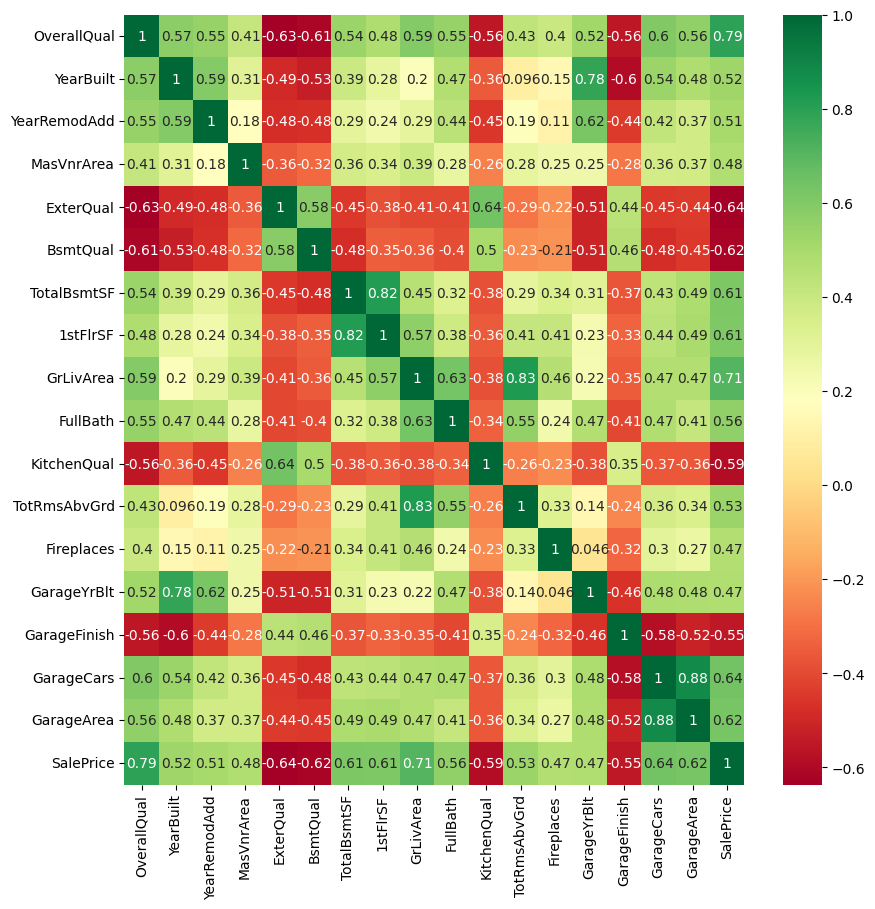

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.46]
plot.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

So from this huge map, as we are only looking to see the corelations with the price of sales, we need to filter all metrics that are not relevants. So we will only keep those values :

## Scatter Overall Quality

Text(0.5, 1.0, 'Sales price vs Overall quality')

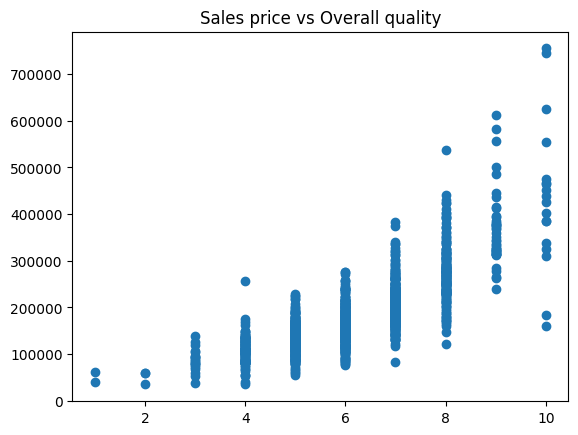

In [ ]:
plot.scatter(df.OverallQual, df.SalePrice)
plot.title("Sales price vs Overall quality")

Certainement l'une des métrics les plus parlantes quant à sa relation avec le prix total du bien, qui est assez linéaire.

## Above ground living area (.71)

Text(0.5, 1.0, 'Sales price vs Above Ground Area')

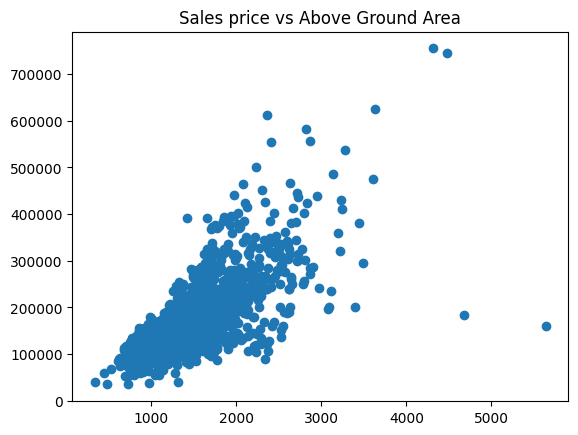

In [ ]:
plot.scatter(df.GrLivArea, df.SalePrice)
plot.title("Sales price vs Above Ground Area")

Seconde métric qui est de loin la plus facile à remarquer, toute surface vivable se trouvant surélevé sera une caractéristique d'un prix élevé.

## Scatter location

Ici nous pouvons clairement constater des villes avec un prix par bien beaucoup plus élevé. Cette statistique se révellera très utile en pour savoir d'avance si un bien à prix élevé va pouvoir se vendre dans une localisation précise.

## Garage (.62 & .64)

Text(0.5, 1.0, 'Sales price vs Garage Capability (.64)')

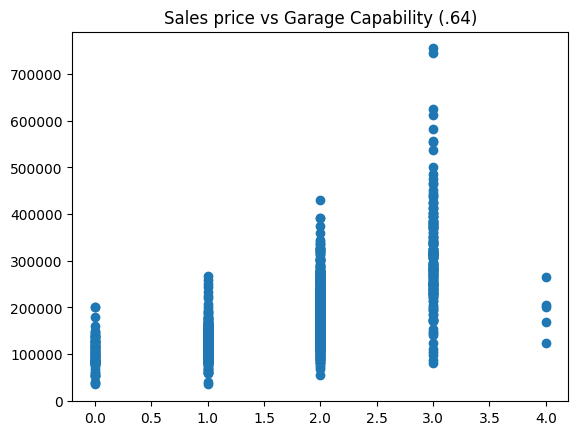

In [ ]:
plot.scatter(df.GarageCars, df.SalePrice)
plot.title("Sales price vs Garage Capability (.64)")

On peut donc remarquer que le garage est plutot linéaire dans sa relation avec le prix du bien total, un garage pouvant contenir plus de voitures et aillant une plus grande surface donnera un bien plus cher.

## Fireplaces (.47)

Text(0.5, 1.0, 'Sales price vs Fireplaces number (.47)')

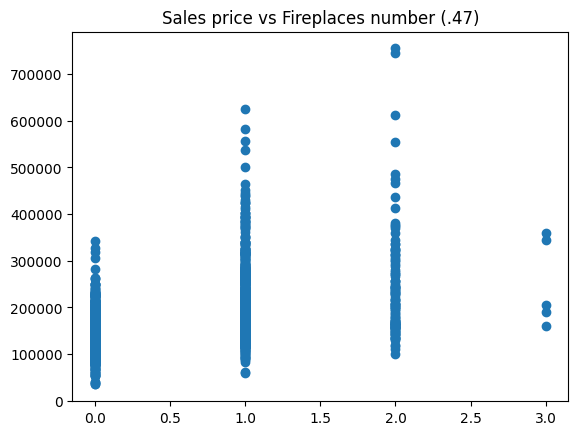

In [ ]:
plot.scatter(df.Fireplaces, df.SalePrice)
plot.title("Sales price vs Fireplaces number (.47)")

Statistique assez étonnante car elle ne révèle pas une grande proximité avec le prix mais un bien aillant une cheminé pourra directement se placer dans la catégorie tarifaire suppérieure. On peut par aillent voir qu'une maison avec plus d'une cheminé ne fait aucune différence, a quelques exceptions prés.

## Basement Aera

Text(0.5, 1.0, 'Sales price vs Basement Aera (.61)')

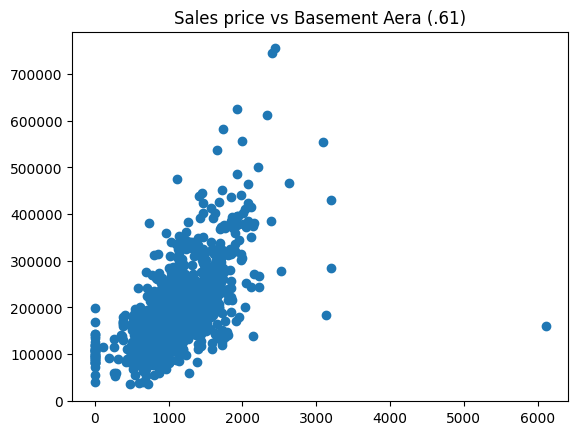

In [ ]:
plot.scatter(df.TotalBsmtSF, df.SalePrice)
plot.title("Sales price vs Basement Aera (.61)")

All living aera totally below ground level is a bonus on the price too ! And it's quite fast.

## First Floor Aera

Text(0.5, 1.0, 'Sales price vs First Floor Aera (.61)')

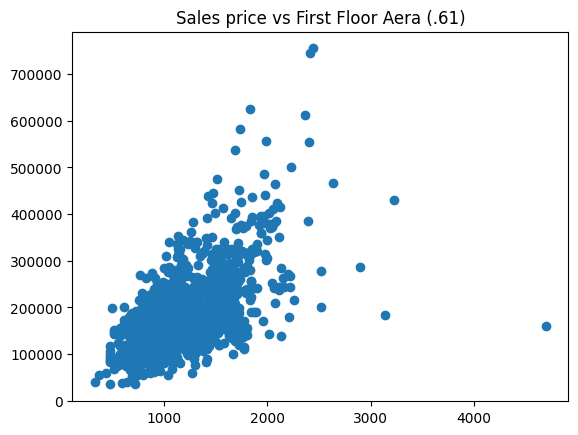

In [ ]:
plot.scatter(df["1stFlrSF"], df.SalePrice)
plot.title("Sales price vs First Floor Aera (.61)")

Satistique assez drole, mais très parlante aussi : la surface vivable du première étage est un bonus assez gros sur le prix, mais toute surface en plus sur le 2nd étage est très loin d'etre aussi important.

In [ ]:
len(df_test.columns), len(df.columns)

(80, 80)

In [ ]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns
categorical_columns

Index([], dtype='object')

## Training

Traning and test only with train file

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

trained = LinearRegression()
label = df["SalePrice"]
features = df.drop(["SalePrice"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
trained.fit(X_train, y_train)
trained.score(X_test, y_test)

0.8437701953339124

Train and test with separated whole files

## Gradiant boosting regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)
est.score(X_test, y_test)

0.8415918600809671

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

y_pred = lgbm.score(X_test, y_test)
y_pred


0.8910929691761879

In [ ]:
# XGBRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train, y_train)

y_pred = xgb.score(X_test, y_test)
y_pred

0.9098141621016295

## Testing on local test file

In [ ]:
# Predict df_test with xbg
y_pred = xgb.predict(df_test)
y_pred

ValueError: Feature shape mismatch, expected: 79, got 80